# Gradient Descent
-----------
Gradient descent is a first-order iterative optimization algorithm for finding the **minimum of a function**. To find a **local minimum** of a function using gradient descent, one **takes steps proportional to the negative of the gradient** (or approximate gradient) of the function at the current point. If, instead, **one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function**; the procedure is then known as gradient ascent.

![gradient descent](https://github.com/rritec/datahexa/blob/dev/images/dl/dl5.png?raw=true)

[Gradient Descent layman terminology](https://en.wikipedia.org/wiki/Gradient_descent#An_analogy_for_understanding_gradient_descent)

[Gradient Descent maths and coding from wiki](https://en.wikipedia.org/wiki/Gradient_descent)

- If the slope is positive:
    - Going opposite the slope means moving to lower numbers
    - Subtract the slope from the current value
    - Too big a step might lead us astray
3.	Solution: learning rate
    - Update each weight by subtracting
    - learning rate * slope


## 1. Exercise 1: Calculating Slope and Improving model weights
![gradient descent](https://github.com/rritec/datahexa/blob/dev/images/dl/dl6.png?raw=true)

### Step 1 of 2: Calculate slope/gradient

In [21]:
import numpy as np

In [22]:
# Define inputs
input_data = np.array([3, 4])
# Define weights
weights = np.array([1, 2])
# real value
target = 6
learning_rate = 0.01

In [23]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()
preds

11

In [24]:
# Calculate the error: error
error = preds - target
print(error)

5


In [25]:
# Calculate the slope: slope/gradient
gradient = 2 * input_data * error
gradient

array([30, 40])

### Step 2 of 2: Improving Model weights

In [26]:
weights_updated = weights - (learning_rate * gradient)
weights_updated

array([0.7, 1.6])

In [27]:
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)

2.5


## 2. Exercise 2: Calculating Slope, Update weights and Calculating mse

![image](https://github.com/rritec/datahexa/blob/dev/images/ds%20000014.png?raw=true)

### Step 1 of 3: Calculating slopes

In [5]:
import numpy as np
# given input and targets are 
input_data = np.array([1,2,3])
target = 0
# assumed weights are
weights = np.array([0,2,1])

In [6]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()
preds

7

In [7]:
# Calculate the error: error
error = preds - target
error

7

In [8]:
# Calculate the slope: slope/gradient
slope = 2 * input_data * error
# Print the slope
print(slope)

[14 28 42]


### Step 2 of 3: Improving Model Weights

In [9]:
# Set the learning rate: learning_rate
learning_rate = 0.01

In [10]:
# Update the weights: weights_updated
weights_updated = weights - (learning_rate * slope)
weights_updated

array([-0.14,  1.72,  0.58])

In [11]:
# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()
preds_updated

5.04

In [12]:
# Calculate updated error: error_updated
error_updated = preds_updated - target

In [13]:
# Print the original error
print("before updateing weights error is : ",error)
# Print the updated error
print("after updateing weights error is : ",error_updated)

before updateing weights error is :  7
after updateing weights error is :  5.04


### Step 3 of 3:Making multiple updates to weights

In [1]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

In [2]:
def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

In [3]:
def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

In [14]:
n_updates = 20
mse_hist = []
# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights) 
    # Update the weights: weights
    weights = weights - 0.01 * slope    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)    
    # Append the mse to mse_hist
    mse_hist.append(mse)

In [15]:
mse_hist

[25.401600000000002,
 13.16818944,
 6.826389405696002,
 3.538800267912807,
 1.834514058885999,
 0.9510120881265021,
 0.4930046664847785,
 0.2555736191057092,
 0.13248936414439966,
 0.06868248637245665,
 0.035605000935481655,
 0.018457632484953686,
 0.009568436680199997,
 0.004960277575015649,
 0.0025714078948881436,
 0.0013330178527099956,
 0.0006910364548448491,
 0.0003582332981915815,
 0.0001857081417825098,
 9.627110070005501e-05]

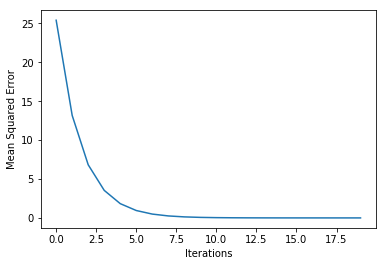

In [33]:
# Plot the mse history
import matplotlib.pyplot as plt
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show() # Notice that, the mean squared error decreases as the number of iterations go up.